In [1]:
import sys
assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
import pandas as pd

In [6]:
# use sklearn to load the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# load into pandas dataframe
df_feature = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(data=housing.target, columns=housing.target_names)
df_housing = pd.concat([df_feature, df_target], axis=1)

In [7]:
# take a look at the data
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


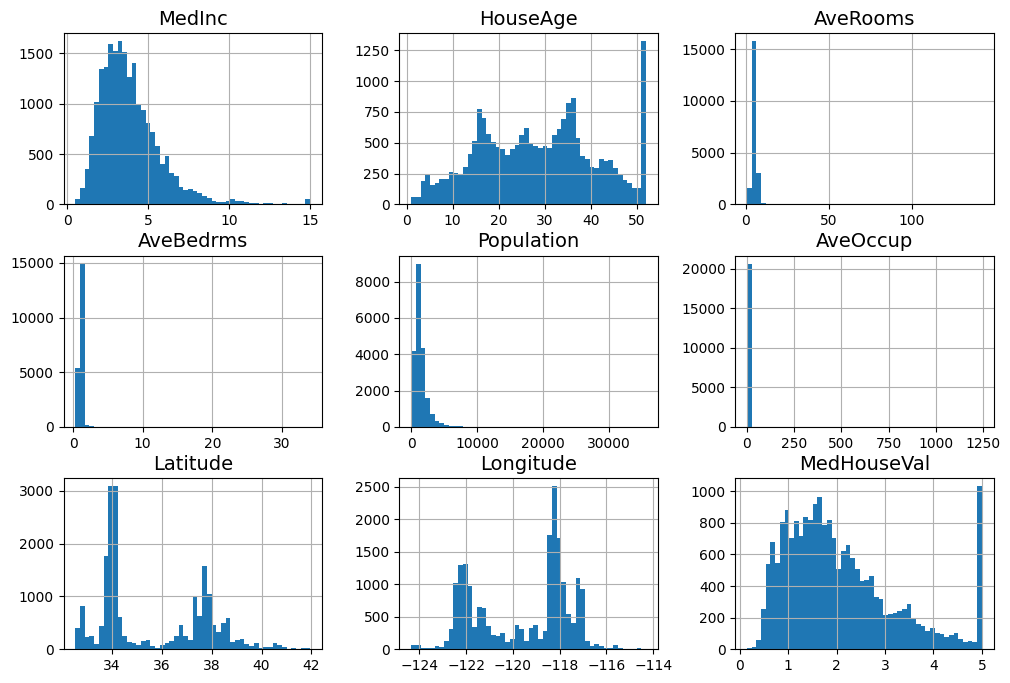

In [10]:
df_housing.hist(bins=50, figsize=(12, 8))
plt.show()

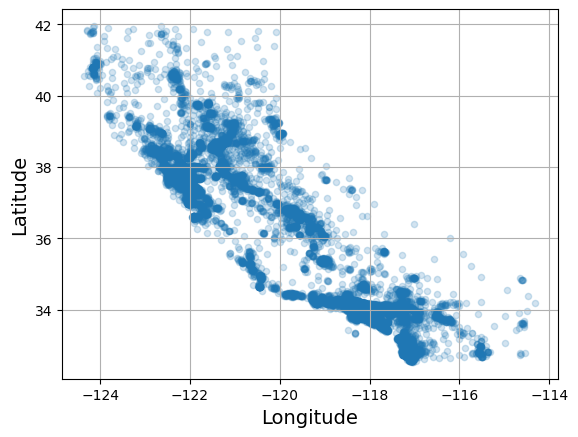

In [11]:
df_housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

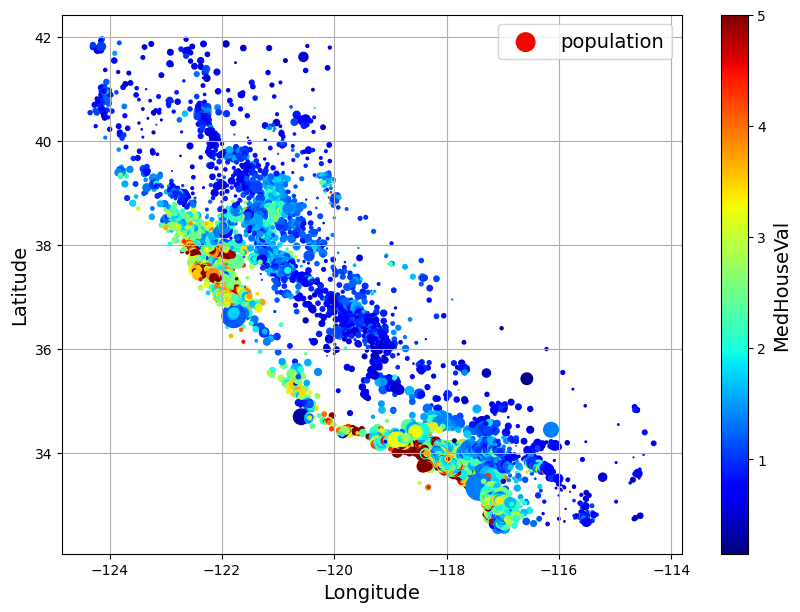

In [12]:
df_housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=df_housing["Population"] / 100, label="population",
             c="MedHouseVal", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [13]:
# check for correlations
corr_matrix = df_housing.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

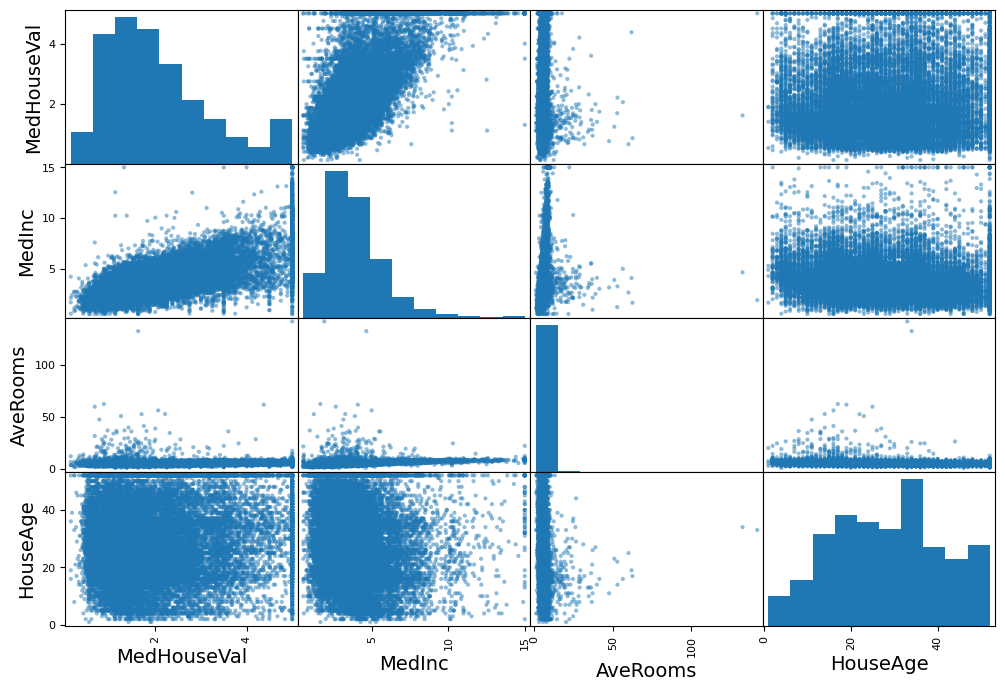

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["MedHouseVal", "MedInc", "AveRooms",
              "HouseAge"]
scatter_matrix(df_housing[attributes], figsize=(12, 8))
plt.show()

In [15]:
# use sklearn to split the California housing dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=482)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=492)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 48 (196.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


Epoch 1/20
1161/1161 [==============================] - 1s 566us/step - loss: 0.5053 - root_mean_squared_error: 0.7108 - val_loss: 0.4391 - val_root_mean_squared_error: 0.6627
Epoch 2/20
1161/1161 [==============================] - 1s 644us/step - loss: 0.4368 - root_mean_squared_error: 0.6609 - val_loss: 0.4467 - val_root_mean_squared_error: 0.6683
Epoch 3/20
1161/1161 [==============================] - 1s 545us/step - loss: 0.4227 - root_mean_squared_error: 0.6502 - val_loss: 0.4046 - val_root_mean_squared_error: 0.6361
Epoch 4/20
1161/1161 [==============================] - 1s 513us/step - loss: 0.4156 - root_mean_squared_error: 0.6447 - val_loss: 0.4284 - val_root_mean_squared_error: 0.6545
Epoch 5/20
1161/1161 [==============================] - 1s 525us/step - loss: 0.4133 - root_mean_squared_error: 0.6429 - val_loss: 0.3981 - val_root_mean_squared_error: 0.6309
Epoch 6/20
1161/1161 [==============================] - 1s 499us/step - loss: 0.4035 - root_mean_squared_error: 0.6353 -

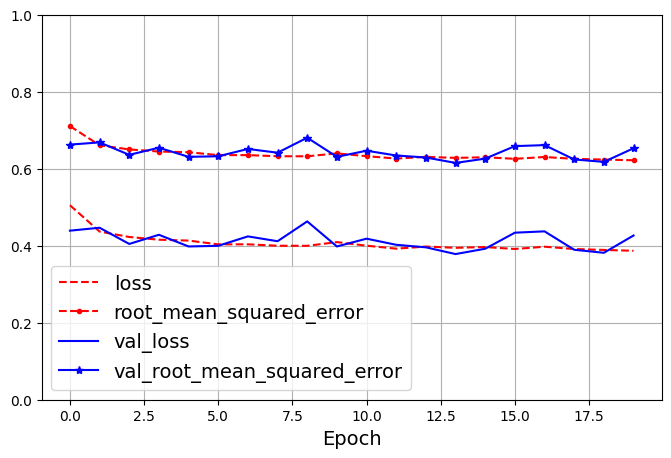

RMSE for test dataset:  0.6476010084152222
Targets for a few test points [0.597 1.369 4.167]
Predictions for test points [[1.1534121 1.7810204 3.1432836]]


In [17]:
# use keras to set up and run neural net for regression
tf.random.set_seed(882)

# normalize inputs
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# define layers
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(3, activation="tanh"),
    tf.keras.layers.Dense(1)
])

# display network architecture summary
model.summary()

# set up optimizer and loss function
optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=1e-1)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# training
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, batch_size=10,
                    validation_data=(X_valid, y_valid))

# testing
mse_test, rmse_test = model.evaluate(X_test, y_test)

# predicting
X_new = X_test[:3]
y_pred = model.predict(X_new)

# plot training metrics as function of epochs 
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, ylim=[0, 1], xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="best")  
plt.show()

# print testing and prediction
print("RMSE for test dataset: ",rmse_test)
print("Targets for a few test points", y_test[:3])
print("Predictions for test points", y_pred.T)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 50)                450       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
__________________

Epoch 1/20
363/363 [==============================] - 1s 973us/step - loss: 0.9958 - root_mean_squared_error: 0.9979 - val_loss: 0.4543 - val_root_mean_squared_error: 0.6741
Epoch 2/20
363/363 [==============================] - 0s 761us/step - loss: 0.4494 - root_mean_squared_error: 0.6704 - val_loss: 0.3957 - val_root_mean_squared_error: 0.6291
Epoch 3/20
363/363 [==============================] - 0s 929us/step - loss: 0.3843 - root_mean_squared_error: 0.6199 - val_loss: 0.3788 - val_root_mean_squared_error: 0.6155
Epoch 4/20
363/363 [==============================] - 0s 891us/step - loss: 0.3645 - root_mean_squared_error: 0.6038 - val_loss: 0.3600 - val_root_mean_squared_error: 0.6000
Epoch 5/20
363/363 [==============================] - 0s 881us/step - loss: 0.3647 - root_mean_squared_error: 0.6039 - val_loss: 0.3430 - val_root_mean_squared_error: 0.5857
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3412 - root_mean_squared_error: 0.5842 - val_loss: 0.3

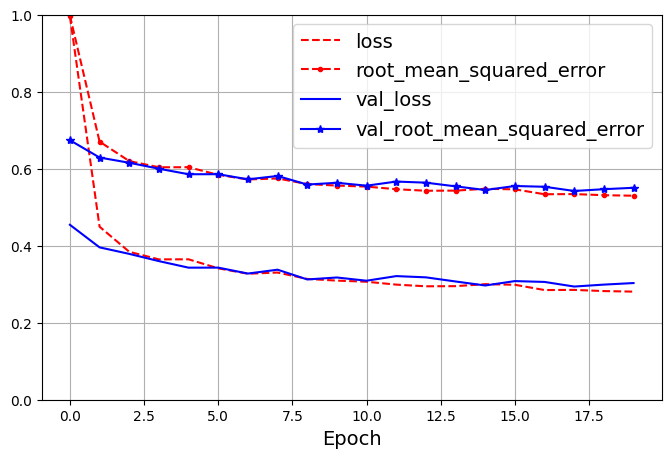

RMSE for test dataset:  0.5399209260940552
Targets for a few test points [0.597 1.369 4.167]
Predictions for test points [[0.6414455 1.5522062 3.4074466]]


In [18]:
# use keras to set up and run neural net for regression
tf.random.set_seed(7942)

# normalize inputs
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# define layers
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# display network atchitecture summary
model.summary()

# set up optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# training
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

# testing
mse_test, rmse_test = model.evaluate(X_test, y_test)

# predicting
X_new = X_test[:3]
y_pred = model.predict(X_new)

# plot training metrics as function of epochs 
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, ylim=[0, 1], xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="best")  
plt.show()

# print testing and prediction
print("RMSE for test dataset: ",rmse_test)
print("Targets for a few test points", y_test[:3])
print("Predictions for test points", y_pred.T)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_14 (Dense)            (None, 500)               4500      
                                                                 
 dense_15 (Dense)            (None, 500)               250500    
                                                                 
 dense_16 (Dense)            (None, 500)               250500    
                                                                 
 dense_17 (Dense)            (None, 500)               250500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                      

Epoch 1/100
581/581 [==============================] - 4s 7ms/step - loss: 0.8320 - root_mean_squared_error: 0.9121 - val_loss: 0.5490 - val_root_mean_squared_error: 0.7409
Epoch 2/100
581/581 [==============================] - 4s 7ms/step - loss: 0.5102 - root_mean_squared_error: 0.7143 - val_loss: 0.5135 - val_root_mean_squared_error: 0.7166
Epoch 3/100
581/581 [==============================] - 4s 7ms/step - loss: 0.4782 - root_mean_squared_error: 0.6916 - val_loss: 0.4888 - val_root_mean_squared_error: 0.6991
Epoch 4/100
581/581 [==============================] - 4s 7ms/step - loss: 0.4649 - root_mean_squared_error: 0.6819 - val_loss: 0.4352 - val_root_mean_squared_error: 0.6597
Epoch 5/100
581/581 [==============================] - 4s 7ms/step - loss: 0.4466 - root_mean_squared_error: 0.6683 - val_loss: 0.4355 - val_root_mean_squared_error: 0.6599
Epoch 6/100
581/581 [==============================] - 4s 7ms/step - loss: 0.4121 - root_mean_squared_error: 0.6419 - val_loss: 0.4125 

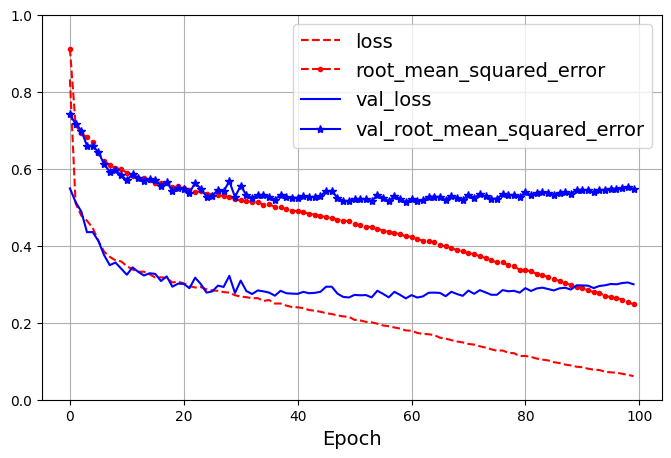

RMSE for test dataset:  0.5346301198005676
Targets for a few test points [0.597 1.369 4.167]
Predictions for test points [[0.58827806 1.1264188  3.1957915 ]]


In [20]:
# use keras to set up and run neural net for regression
tf.random.set_seed(702)

# normalize inputs
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# define layers
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(500, activation="tanh"),
    tf.keras.layers.Dense(500, activation="tanh"),
    tf.keras.layers.Dense(500, activation="tanh"),
    tf.keras.layers.Dense(500, activation="tanh"),
    tf.keras.layers.Dense(500, activation="tanh"),
    tf.keras.layers.Dense(1)
])

# display network atchitecture summary
model.summary()

# set up optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-7)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# training
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_valid, y_valid))

# testing
mse_test, rmse_test = model.evaluate(X_test, y_test)

# predicting
X_new = X_test[:3]
y_pred = model.predict(X_new)

# plot training metrics as function of epochs 
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, ylim=[0, 1], xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="best")  
plt.show()

# print testing and prediction
print("RMSE for test dataset: ",rmse_test)
print("Targets for a few test points", y_test[:3])
print("Predictions for test points", y_pred.T)

In [60]:
print(rmse_test)
print(y_test[:3])
print(y_pred.T)

0.7019765377044678
[0.477   0.458   5.00001]
[[0.45502472 1.8356513  3.2225633 ]]
